In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_json("http://127.0.0.1:5500/api/v1.0/perthcity")

In [3]:
df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-01,1,2020-01,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020-01,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-01,3,2021-01,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-01,4,2020-01,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-01,5,2021-01,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018-01,1616,2013-01,WA,Northbridge
1616,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900-01,1617,2013-01,WA,Northbridge
1617,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014-01,1618,2013-01,WA,Northbridge
1618,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011-01,1619,2013-01,WA,Northbridge


In [4]:
#only getting landed properties for the machine learning
house = df[(df['property_type']=='House') | (df['property_type']=='Villa') | (df['property_type']=='Townhouse')]
house

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020-01,WA,Perth
5,1/63 Palmerston Street,Carlos Lehn,2,3,185,2000,2,1/63 Palmerston Street Perth WA 6000,176,-31.939400,115.859400,6000,821000,House,0,1900-01,6,2019-01,WA,Perth
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,115.867500,6000,1308000,House,700,2018-01,7,2021-01,WA,Perth
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,115.864298,6000,880000,House,550,2018-01,8,2020-01,WA,Perth
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,115.871931,6000,447500,Townhouse,460,2013-01,9,2020-01,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,221 Newcastle Street,Limnios Property Group - Perth,1,2,108,1920,1,221 Newcastle Street Northbridge WA 6003,179,-31.946080,115.860120,6003,640000,House,450,2011-01,1593,2014-01,WA,Northbridge
1597,10/5 Antonas Road,Capital First National - Alexander Heights,1,1,67,2010,1,10/5 Antonas Road Northbridge WA 6003,93,-31.944030,115.854829,6003,440000,House,430,2010-01,1598,2014-01,WA,Northbridge
1600,21 Little Shenton Lane,Nicheliving Real Estate - Perth,2,3,121,1995,2,21 Little Shenton Lane Northbridge WA 6003,196,-31.946116,115.853643,6003,785000,Townhouse,600,2020-01,1601,2013-01,WA,Northbridge
1610,7 Davies Street,Abel McGrath the Property People - Leederville,2,3,227,2005,2,7 Davies Street Northbridge WA 6003,255,-31.944449,115.855850,6003,1025000,House,0,1900-01,1611,2013-01,WA,Northbridge


In [5]:
house.columns

Index(['address', 'agent', 'bathrooms', 'bedrooms', 'building_size',
       'built_date', 'car_space', 'full_address', 'land_size', 'lat', 'lng',
       'postcode', 'price', 'property_type', 'rent', 'rent_date', 'sale_id',
       'sold_date', 'state', 'suburb'],
      dtype='object')

In [6]:
# for i in range(0,len(house['sale_id'])):
#     if house.iloc[i,13] =='Villa':
#         house.iloc[i,13] = 1
#     elif house.iloc[i,13] =='Townhouse':
#         house.iloc[i,13]= 2
#     elif house.iloc[i,13] =='House':
#         house.iloc[i,13] = 3
    
#     house.iloc[i,15] = int(house.iloc[i,15].split('-')[0])
#     if house.iloc[i,15]== 1900:
#         house.iloc[i,15] = 0
# house

In [7]:
# Assign the data to X and y
X = house[["bedrooms", "bathrooms", "car_space", "land_size", "building_size", "built_date", "postcode"]]
y = house["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(482, 7) (482, 1)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [10]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [11]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

In [12]:
# #evaluate the model (intercept and slope)
# print(model.intercept_)
# print(model.coef_)

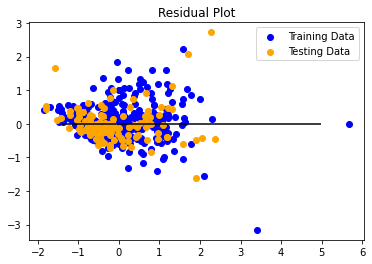

In [13]:
# Make predictions using a fitted model
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [14]:
#compare actual output values with predicted values
df1 = X_test
df1['Actual'] = y_test.reshape(1,-1)[0]
df1['Linear_Regression_Predicted'] = y_scaler.inverse_transform(model.predict(X_test_scaled))
df1.head(10)

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,bedrooms,bathrooms,car_space,land_size,building_size,built_date,postcode,Actual,Predicted
1344,1,1,1,145,90,2006,6009,560000,4.818520e+05
938,2,2,1,172,95,1938,6009,607000,1.018934e+06
469,2,1,0,216,108,1900,6005,678000,8.018333e+05
7,2,2,2,241,174,1995,6000,880000,7.226916e+05
1182,3,1,2,110,110,1976,6009,520000,9.103590e+05
398,3,1,1,369,158,1920,6005,925000,1.028106e+06
1009,2,1,1,84,84,1981,6009,570000,6.587079e+05
1179,5,3,6,1013,248,1938,6009,1820000,2.217427e+06
1427,2,2,1,132,95,2010,6003,408000,5.101608e+05
1268,4,2,2,461,266,2003,6009,1525000,1.517183e+06


In [15]:
# Fit the model to the training data and calculate the scores for the training and testing data

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7109807913697777
Testing Score: 0.7201175294992932


In [16]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2895068798418012, R2: 0.7201175294992932


In [17]:
#test
# suburb needs to be categorical
X_test = X_scaler.transform([[4,3,2,175,186,2019,6009]])
predictions = model.predict(X_test)
results = y_scaler.inverse_transform(predictions)
results


array([[1407195.41980715]])

# LASSO model

In [18]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

lasso_predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, lasso_predictions) #error to a model (closer to 0 the better)
r2 = lasso.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2864381017965127, R2: 0.7230842886353905


In [19]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

lasso_grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

lasso_grid_result = lasso_grid.fit(X_train_scaled, y_train_scaled)

# lasso_grid_predictions = lasso_grid_model(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, lasso_grid_predictions) #error to a model (closer to 0 the better)
# r2 = lasso_grid_model.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', lasso_grid_result.best_score_)
print('Best Params: ', lasso_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6239668914423884
Best Params:  {'alpha': 0.01}


In [20]:
best_lasso = Lasso(alpha=0.001).fit(X_train_scaled, y_train_scaled)

best_lasso_predictions = best_lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_lasso_predictions)
r2 = best_lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2891599939293775, R2: 0.720452883485368


In [26]:
df1['Lasso_Predicted'] = y_scaler.inverse_transform(best_lasso.predict(X_test_scaled))
df1.head(10)

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bedrooms,bathrooms,car_space,land_size,building_size,built_date,postcode,Actual,Predicted,Lasso_Predicted
1344,1,1,1,145,90,2006,6009,560000,4.818520e+05,4.831406e+05
938,2,2,1,172,95,1938,6009,607000,1.018934e+06,1.017669e+06
469,2,1,0,216,108,1900,6005,678000,8.018333e+05,8.015487e+05
7,2,2,2,241,174,1995,6000,880000,7.226916e+05,7.240486e+05
1182,3,1,2,110,110,1976,6009,520000,9.103590e+05,9.108243e+05
398,3,1,1,369,158,1920,6005,925000,1.028106e+06,1.028186e+06
1009,2,1,1,84,84,1981,6009,570000,6.587079e+05,6.594880e+05
1179,5,3,6,1013,248,1938,6009,1820000,2.217427e+06,2.214023e+06
1427,2,2,1,132,95,2010,6003,408000,5.101608e+05,5.116925e+05
1268,4,2,2,461,266,2003,6009,1525000,1.517183e+06,1.517759e+06


# Ridge model

In [21]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

ridge_predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, ridge_predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2895095571441206, R2: 0.7201149412016064


In [22]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

ridge_grid_result = ridge_grid.fit(X_train_scaled, y_train_scaled)

# ridge_grid_predictions = ridge_grid(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, ridge_grid_predictions) #error to a model (closer to 0 the better)
# r2 = ridge_grid.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', ridge_grid_result.best_score_)
print('Best Params: ', ridge_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6461806228582152
Best Params:  {'alpha': 100}


In [23]:
best_ridge = Ridge(alpha=10).fit(X_train_scaled, y_train_scaled)

best_ridge_predictions = best_ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_ridge_predictions)
r2 = best_ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2921519224624369, R2: 0.7175604190649998


In [27]:
df1['Ridge_Predicted'] = y_scaler.inverse_transform(best_ridge.predict(X_test_scaled))
df1.head(10)

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bedrooms,bathrooms,car_space,land_size,building_size,built_date,postcode,Actual,Predicted,Lasso_Predicted,Ridge_Predicted
1344,1,1,1,145,90,2006,6009,560000,4.818520e+05,4.831406e+05,4.848760e+05
938,2,2,1,172,95,1938,6009,607000,1.018934e+06,1.017669e+06,1.013887e+06
469,2,1,0,216,108,1900,6005,678000,8.018333e+05,8.015487e+05,7.945708e+05
7,2,2,2,241,174,1995,6000,880000,7.226916e+05,7.240486e+05,7.246859e+05
1182,3,1,2,110,110,1976,6009,520000,9.103590e+05,9.108243e+05,9.184264e+05
398,3,1,1,369,158,1920,6005,925000,1.028106e+06,1.028186e+06,1.024743e+06
1009,2,1,1,84,84,1981,6009,570000,6.587079e+05,6.594880e+05,6.640003e+05
1179,5,3,6,1013,248,1938,6009,1820000,2.217427e+06,2.214023e+06,2.213999e+06
1427,2,2,1,132,95,2010,6003,408000,5.101608e+05,5.116925e+05,5.196446e+05
1268,4,2,2,461,266,2003,6009,1525000,1.517183e+06,1.517759e+06,1.515184e+06


# ElasticNet model

In [24]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

elas_predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, elas_predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.28841391600633154, R2: 0.7211741586840861


In [25]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

elasticnet_grid = GridSearchCV(estimator=elasticnet, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

elasticnet_grid_result= elasticnet_grid.fit(X_train_scaled, y_train_scaled)

# elasticnet_grid_predictions = elasticnet_grid(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, elasticnet_grid_predictions) #error to a model (closer to 0 the better)
# r2 = elasticnet_grid.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', elasticnet_grid_result.best_score_)
print('Best Params: ', elasticnet_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6303958402142305
Best Params:  {'alpha': 0.1}


In [28]:
df1['elasticnet_Predicted'] = y_scaler.inverse_transform(elasticnet.predict(X_test_scaled))
df1.head(10)

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bedrooms,bathrooms,car_space,land_size,building_size,built_date,postcode,Actual,Predicted,Lasso_Predicted,Ridge_Predicted,elasticnet_Predicted
1344,1,1,1,145,90,2006,6009,560000,4.818520e+05,4.831406e+05,4.848760e+05,4.886535e+05
938,2,2,1,172,95,1938,6009,607000,1.018934e+06,1.017669e+06,1.013887e+06,1.011674e+06
469,2,1,0,216,108,1900,6005,678000,8.018333e+05,8.015487e+05,7.945708e+05,7.989572e+05
7,2,2,2,241,174,1995,6000,880000,7.226916e+05,7.240486e+05,7.246859e+05,7.296963e+05
1182,3,1,2,110,110,1976,6009,520000,9.103590e+05,9.108243e+05,9.184264e+05,9.142175e+05
398,3,1,1,369,158,1920,6005,925000,1.028106e+06,1.028186e+06,1.024743e+06,1.027831e+06
1009,2,1,1,84,84,1981,6009,570000,6.587079e+05,6.594880e+05,6.640003e+05,6.635209e+05
1179,5,3,6,1013,248,1938,6009,1820000,2.217427e+06,2.214023e+06,2.213999e+06,2.200096e+06
1427,2,2,1,132,95,2010,6003,408000,5.101608e+05,5.116925e+05,5.196446e+05,5.195192e+05
1268,4,2,2,461,266,2003,6009,1525000,1.517183e+06,1.517759e+06,1.515184e+06,1.519661e+06
